In [266]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Đọc file csv trong đó, header của bảng dữ liệu là 2 dòng đầu tiên


In [267]:
#Read the first 2 rows of the data to retrieve the column names
df = pd.read_csv('Preprocessing_data/data.csv', header=[0,1])
df.columns




MultiIndex([(               'Year', 'Countries, territories and areas'),
            (              ' 2019',                      ' Both sexes'),
            (              ' 2019',                            ' Male'),
            (              ' 2019',                          ' Female'),
            (              ' 2018',                      ' Both sexes'),
            (              ' 2018',                            ' Male'),
            (              ' 2018',                          ' Female'),
            (              ' 2017',                      ' Both sexes'),
            (              ' 2017',                            ' Male'),
            (              ' 2017',                          ' Female'),
            (              ' 2016',                      ' Both sexes'),
            (              ' 2016',                            ' Male'),
            (              ' 2016',                          ' Female'),
            (              ' 2015',                

Nhiệm vụ: 
1. Chuẩn hóa và đổi lại tên cột dữ liệu
2. Sort lại danh sách theo tên các châu lục

In [268]:
#Processing and column name by deleting white space and renaming the column name
df.columns = pd.MultiIndex.from_tuples(
    [(col[0] if "Unnamed" not in col[0] else "continent_list", col[1]) for col in df.columns]
)
df.columns = pd.MultiIndex.from_tuples(
    [(col[0].strip(), col[1].strip()) for col in df.columns]
)
#Sort all countries by their continent
df_sorted = df.sort_values(by=[("continent_list", "Continent")], ascending=True)
df_sorted

Year       2019                    2018        \
    Countries, territories and areas Both sexes  Male Female Both sexes  Male   
182                         Zimbabwe       41.2  67.9   16.9       40.6  66.8   
144                       Seychelles       11.3  17.6    4.5       11.4  17.8   
32          Central African Republic       37.7  52.0   23.7       36.0  49.5   
33                              Chad       32.4  43.3   21.6       30.6  40.8   
142                          Senegal       23.5  34.6   13.0       23.7  34.7   
..                               ...        ...   ...    ...        ...   ...   
34                             Chile       14.9  23.6    6.5       14.0  21.8   
49                           Ecuador       20.1  31.2    9.0       20.7  32.2   
22                            Brazil       16.0  26.9    5.6       17.1  28.9   
175                          Uruguay       14.8  23.6    6.5       15.8  25.4   
70                            Guyana       22.3  38.9    5.6       22.5  39.3   

                 2017               ...       2002                    2001  \
    Female Both sexes  Male Female  ... Both sexes  Male Female Both sexes   
182   16.8       40.1  65.7   16.7  ...       32.4  57.5    8.6       29.7   
144    4.6       11.4  17.9    4.6  ...       19.0  30.8    7.4       12.1   
32    22.7       35.3  48.4   22.5  ...       31.6  41.6   21.9       31.9   
33    20.5       28.9  38.4   19.4  ...       26.4  35.0   18.0       26.6   
142   13.2       23.8  34.7   13.5  ...       24.7  34.3   15.4       24.6   
..     ...        ...   ...    ...  ...        ...   ...    ...        ...   
34     6.4       14.0  22.7    5.5  ...       16.0  26.7    5.6       16.2   
49     9.2       21.3  33.5    9.1  ...       15.0  22.9    7.1       14.8   
22     5.8       18.7  31.1    6.7  ...       21.2  34.7    8.0       20.1   
175    6.8       14.1  22.3    6.4  ...       12.3  19.3    5.8       15.6   
70     5.7       22.7  39.6    5.7  ...       24.0  39.6    8.4       24.3   

                       2000              continent_list  
     Male Female Both sexes  Male Female      Continent  
182  53.2    7.4       29.3  52.7    6.9         Africa  
144  19.6    4.7       13.6  22.0    5.2         Africa  
32   41.8   22.3       32.3  42.0   23.0         Africa  
33   35.2   18.0       27.0  35.7   18.3         Africa  
142  34.1   15.5       24.8  34.1   15.8         Africa  
..    ...    ...        ...   ...    ...            ...  
34   26.4    6.4       17.9  29.5    6.7  South America  
49   22.6    6.9       13.5  20.7    6.3  South America  
22   32.9    7.6       19.7  32.0    7.7  South America  
175  23.8    7.9       16.8  26.2    8.1  South America  
70   42.2    6.4       26.2  42.7    9.9  South America  

[183 rows x 62 columns]

Nhiệm vụ:
Tính toán trung bình số người chết ở cả 2 giới tính của từng châu lục trong từng năm

In [368]:
both_sexes_cols = [(str(year).strip(), "Both sexes") for year in range(2000, 2020) if (str(year).strip(), "Both sexes") in df.columns]

# Group by continent and calculate it for each year
df_mean_continent = df_sorted.groupby(("continent_list", "Continent"))[both_sexes_cols].mean()

#both_sexes_cols = [col for col in df_mean_continent.columns if col[1] == "Both sexes"]





In [369]:
df_mean_continent["mean_both_sexes"] = df_mean_continent[both_sexes_cols].mean(axis=1)

df_mean_continent

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean_both_sexes
,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,,
Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,26.722222,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,17.434043,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,10.120513,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205
North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,14.276190,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,12.230000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,19.950000,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250


Đổi lại tên continent_list,continent thành Continent và tính tỉ lệ tử vong trung bình ở 2 giới tính theo từng châu lục từ 2000 - 2019

In [271]:
df_both_sexes = df_mean_continent.reset_index()
df_both_sexes.columns = ["Continent" if col == ("continent_list", "Continent") else "mean_both_sexes" if col == ("mean_both_sexes", "") else col for col in df_both_sexes.columns]
df_both_sexes.sort_values(by="mean_both_sexes", ascending=False, inplace=True)
total_both_sexes = df_both_sexes[["Continent", "mean_both_sexes"]]
total_both_sexes

,Continent,mean_both_sexes
0,Africa,26.916296
5,South America,19.196250
1,Asia,16.902553
3,North America,14.960476
4,Oceania,11.358000
2,Europe,10.183205


Vẽ pie chart để biểu diễn tỉ lệ % tử vong của từng châu lục trong khoảng thời gian từ 2000 - 2019

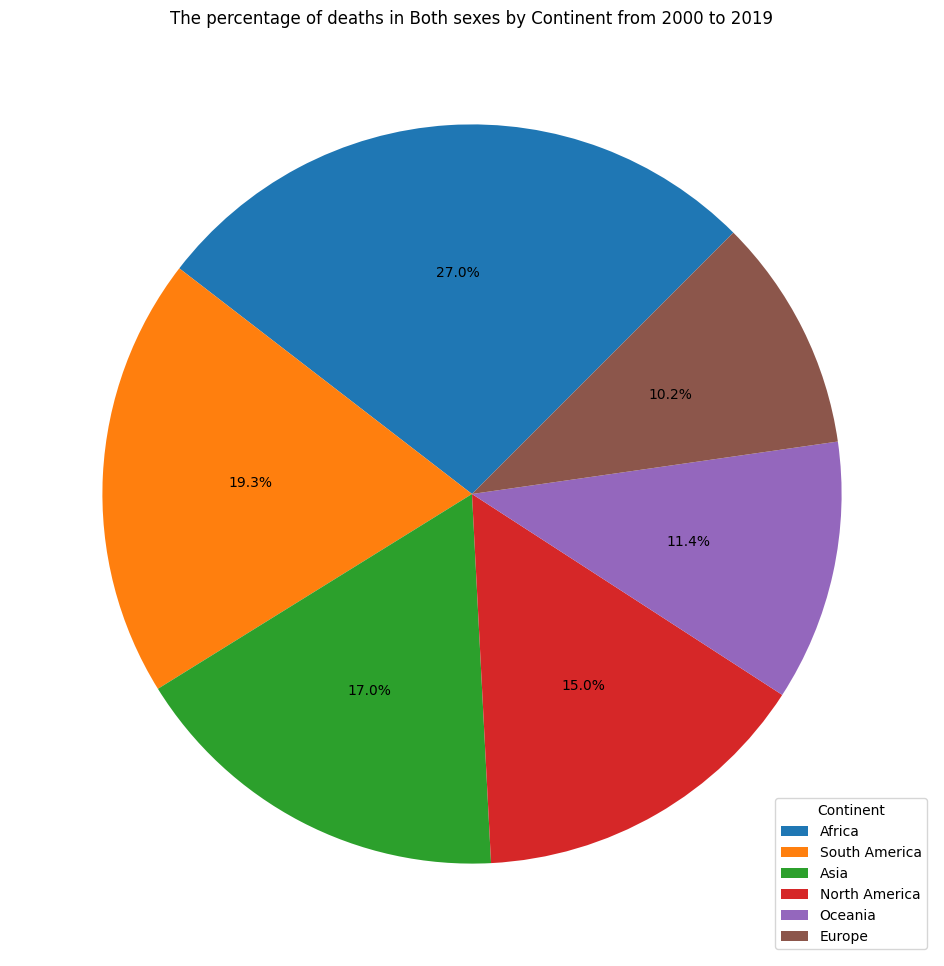

In [273]:
#draw pie chart
labels = df_both_sexes["Continent"]
sizes = df_both_sexes["mean_both_sexes"]
fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(sizes,autopct='%1.1f%%', startangle=45)  
plt.legend(labels, title='Continent' ,loc="lower right")
plt.title("The percentage of deaths in Both sexes by Continent from 2000 to 2019")  
plt.show()

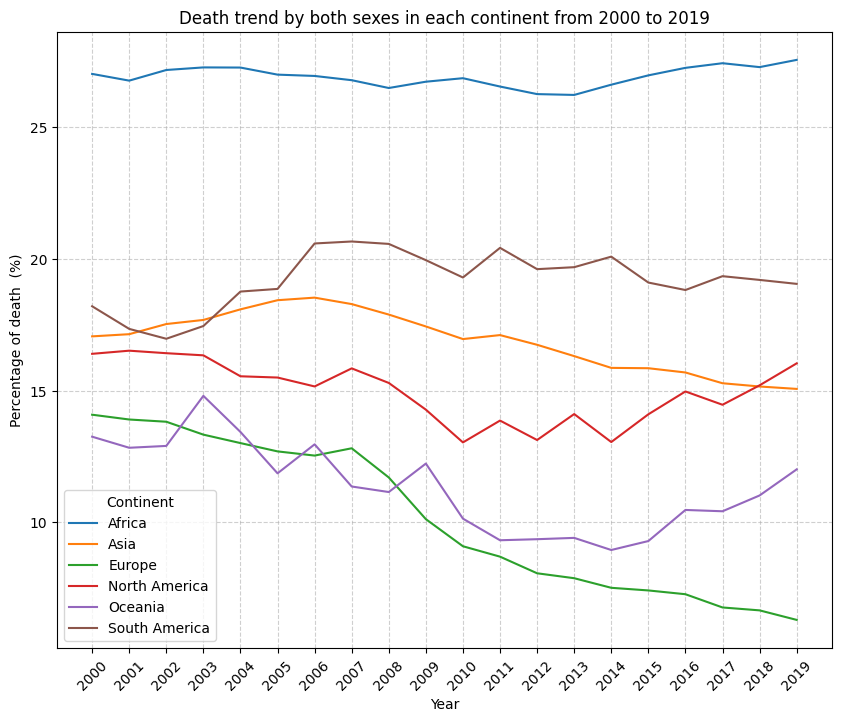

In [274]:
# draw a line chart displays the death trend in each continent from 2000 to 2019
years = [str(year) for year in range(2000, 2020)]    
deaths_year_cont_dict = {}

for continent in df_mean_continent.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict[continent] = [
        df_mean_continent.loc[continent, (year, "Both sexes")] if (year, "Both sexes") in df_mean_continent.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Percentage of death  (%)")
plt.title("Death trend by both sexes in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()


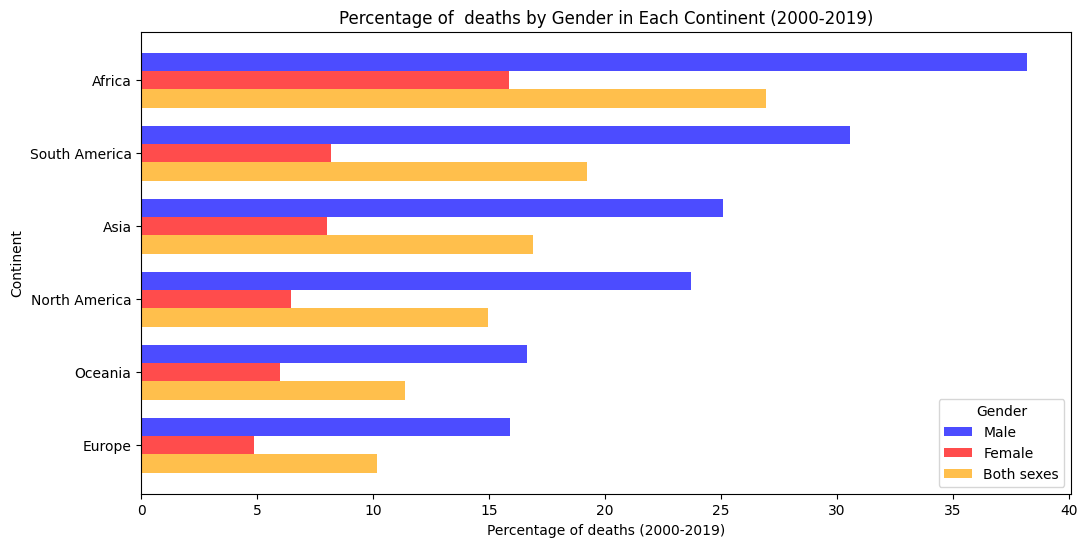

In [275]:
# Create lists of columns for "Male" and "Female" deaths from 2000 to 2019
male_cols = [(str(year).strip(), "Male") for year in range(2000, 2020) if (str(year).strip(), "Male") in df.columns]
female_cols = [(str(year).strip(), "Female") for year in range(2000, 2020) if (str(year).strip(), "Female") in df.columns]

# Group by continent and sum the total deaths for "Male" and "Female" each year
df_mean_continent_male = df_sorted.groupby(("continent_list", "Continent"))[male_cols].mean()
df_mean_continent_female = df_sorted.groupby(("continent_list", "Continent"))[female_cols].mean()

total_male_deaths = df_mean_continent_male.mean(axis=1)
total_female_deaths = df_mean_continent_female.mean(axis=1)

total_male_deaths.sort_values(ascending=False, inplace=True)
total_female_deaths.sort_values(ascending=False, inplace=True)  
total_both_sexes_values = total_both_sexes["mean_both_sexes"].values

# Extract continent names
continents = total_male_deaths.index
# Set up bar positions
y_indexes = np.arange(len(continents))
height = 0.25  # Width of each bar in horizontal bar chart

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(y_indexes - height, total_male_deaths, height=height, label="Male", color="blue", alpha=0.7)
plt.barh(y_indexes, total_female_deaths, height=height, label="Female", color="red", alpha=0.7)
plt.barh(y_indexes + height, total_both_sexes_values, height=height, label="Both sexes", color="orange", alpha=0.7)


# Customize the plot
plt.yticks(ticks=y_indexes, labels=continents)
plt.ylabel("Continent")
plt.xlabel("Percentage of deaths (2000-2019)")
plt.title("Percentage of  deaths by Gender in Each Continent (2000-2019)")
plt.legend(title = "Gender")

# Invert y-axis to match descending order
plt.gca().invert_yaxis()

# Show the chart
plt.show()



In [276]:
df_mean_continent_male

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,
Africa,37.938889,37.642593,38.279630,38.477778,38.479630,38.070370,38.046296,37.801852,37.396296,37.848148,38.114815,37.744444,37.372222,37.312963,37.942593,38.468519,38.983333,39.266667,39.057407,39.487037
Asia,25.036170,25.193617,25.689362,25.993617,26.585106,27.168085,27.278723,27.040426,26.634043,25.934043,25.172340,25.448936,24.942553,24.348936,23.670213,23.627660,23.378723,22.887234,22.725532,22.576596
Europe,21.892308,21.587179,21.551282,20.830769,20.351282,19.769231,19.625641,20.187179,18.538462,15.833333,14.194872,13.551282,12.641026,12.187179,11.730769,11.525641,11.315385,10.433333,10.305128,9.746154
North America,25.933333,26.095238,25.604762,25.823810,24.409524,24.133333,23.571429,24.928571,24.209524,22.842857,20.461905,21.871429,20.523810,22.414286,20.704762,22.614286,24.047619,23.276190,24.509524,25.928571
Oceania,19.200000,18.590000,18.810000,21.790000,19.950000,17.640000,19.420000,16.640000,16.290000,17.580000,14.870000,13.610000,13.750000,13.560000,12.970000,13.550000,15.340000,15.180000,16.110000,17.550000
South America,28.458333,27.275000,26.591667,27.350000,29.491667,29.541667,32.033333,32.616667,32.675000,31.875000,30.441667,32.591667,31.508333,31.700000,32.491667,30.858333,30.341667,31.208333,30.958333,30.683333


In [ ]:
# #draw line chart for male
# years = [str(year) for year in range(2000, 2020)]
# deaths_year_cont_dict_male = {}

# for continent in df_mean_continent_male.index:  # Lặp qua từng châu lục
#     deaths_year_cont_dict_male[continent] = [
#         df_mean_continent_male.loc[continent, (year, "Male")] if (year, "Male") in df_mean_continent_male.columns else None
#         for year in years
#     ]
# plt.figure(figsize=(10,8))
# plt.xlabel("Year")
# plt.ylabel("Deaths by year")
# plt.title("Death trend by Male in each continent from 2000 to 2019")
# for continent, deaths in deaths_year_cont_dict_male.items():
#     plt.plot(years, deaths, label=continent)

# plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
# plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
# plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
# plt.show()


In [371]:
# #draw line chart for female
# years = [str(year) for year in range(2000, 2020)]
# deaths_year_cont_dict_female= {}

# for continent in df_mean_continent_female.index:  # Lặp qua từng châu lục
#     deaths_year_cont_dict_female[continent] = [
#         df_mean_continent_female.loc[continent, (year, "Female")] if (year, "Female") in df_mean_continent_female.columns else None
#         for year in years
#     ]
# plt.figure(figsize=(10,8))
# plt.xlabel("Year")
# plt.ylabel("Deaths by year")
# plt.title("Death trend by Female in each continent from 2000 to 2019")
# for continent, deaths in deaths_year_cont_dict_female.items():
#     plt.plot(years, deaths, label=continent)

# plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
# plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
# plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
# plt.show()


<Figure size 6000x7000 with 0 Axes>

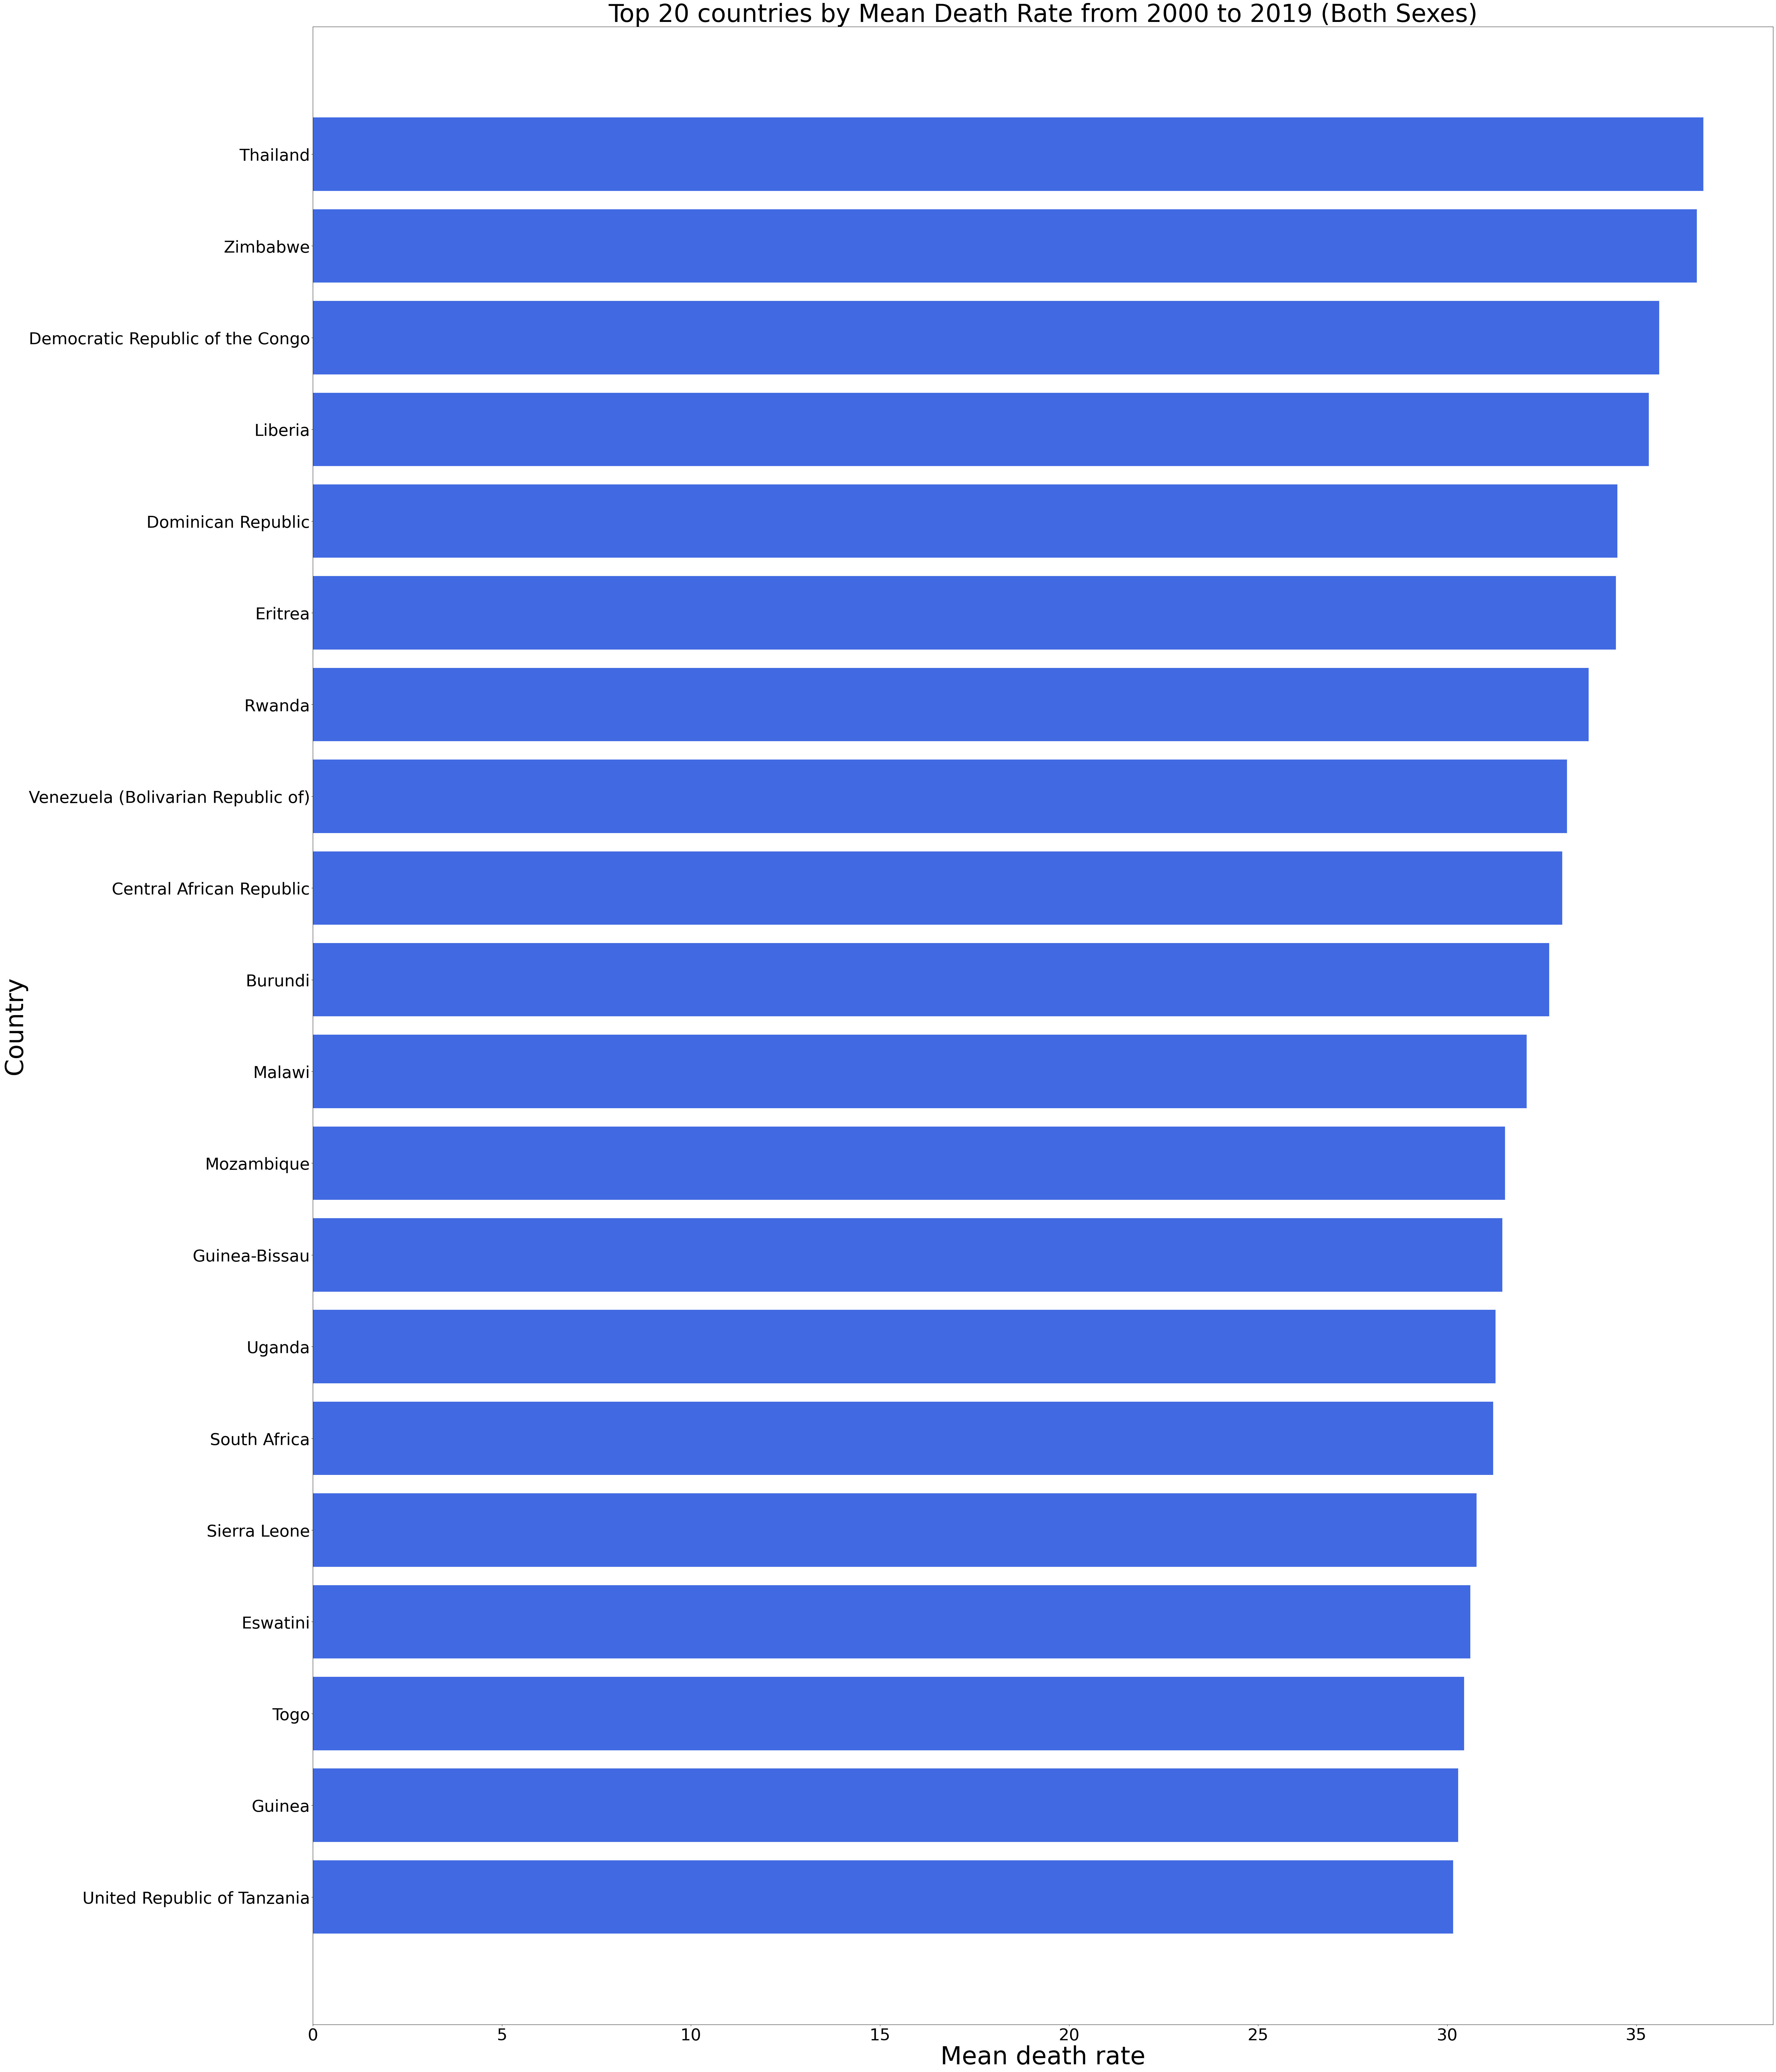

In [358]:
#Column chart for top 20 countries in the world

both_sexes_cols = [col for col in df_sorted.columns if col[1] == "Both sexes"]
df_mean_country = df_sorted.reset_index()
df_mean_country["mean_by_country"] = df_mean_country[both_sexes_cols].mean(axis=1)
df_mean_country = df_mean_country.sort_values(by ="mean_by_country" ,ascending=False)
df_mean_country_display = df_mean_country
df_mean_country_display.columns = ["Country" if col == ("Year", "Countries, territories and areas") else col for col in df_mean_country_display.columns]
df_mean_country_display.columns = ["mean_by_country" if col == ("mean_by_country", '') else col for col in df_mean_country_display.columns]
top_50_df = df_mean_country_display[["Country" ,("mean_by_country")]].head(20)


plt.figure(figsize=(60, 70))  # Tăng kích thước hình vẽ
fig, ax = plt.subplots(figsize=(60, 70))  # Tăng kích thước subplot

ax.barh(top_50_df["Country"].values[::-1], top_50_df["mean_by_country"].values[::-1], color='royalblue')
ax.set_xlabel("Mean death rate", fontsize=60)  # Đổi nhãn trục x và y
ax.set_ylabel("Country", fontsize=60)
ax.set_title("Top 20 countries by Mean Death Rate from 2000 to 2019 (Both Sexes)", fontsize=60)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.tight_layout()  # Tự động điều chỉnh layout để tránh cắt nhãn
plt.show()